### Problem Statement

#### Schools have a responsibility to provide a safe and supportive environment for all students, and to prevent and address bullying behaviour when it occurs. Yet, bullying is a major issue in schools and can have detrimental effects on the mental health and academic performance of students. Despite efforts to prevent and reduce bullying, it continues to be prevalent in schools, leading to negative outcomes for victims, bullies, and bystanders. Traditional methods of detecting and preventing bullying, such as reporting systems and disciplinary measures, are limited and often reactive. There is a need for proactive and effective measures to prevent bullying in schools and promote a safe and healthy learning environment.


### Goal

#### The goal of this project is to develop a machine learning model that can accurately predict bullying based on parameters such as demographic information (age, sex, ethnicity), behavioural factors (history of aggressive behaviour), family-related factors (parental understanding, parents’ education level), individualistic factors (felt lonely, close friends), etc. The model will be trained on historical data collected from schools, and its performance will be evaluated based on its ability to accurately classify instances of bullying. The aim of this project is to provide schools with a tool to identify and prevent bullying, and to create a safe and healthy learning environment for all students.


In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from ipykernel import kernelapp as app

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, \
    recall_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Basic Data Understanding

In [2]:
df = pd.read_csv('Bullying_2018.csv',sep=';') # Import CSV
display(df.head(10))

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,Yes,Yes,,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,,,
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,,,
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,,No,No,No,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,,,
5,6,No,No,No,13 years old,Male,0 times,1 time,Never,3 or more,0 days,Most of the time,Always,No,No,No,No,No
6,7,No,No,No,14 years old,Female,1 time,0 times,Sometimes,3 or more,0 days,Most of the time,Always,No,No,,,
7,8,No,No,No,12 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Never,No,No,,,
8,9,No,No,No,13 years old,Male,1 time,2 or 3 times,Never,3 or more,6 to 9 days,Most of the time,Most of the time,No,Yes,,,
9,10,Yes,No,No,14 years old,Female,0 times,0 times,Always,0,0 days,Sometimes,Never,Yes,No,,,


In [3]:
# Printing out all the features

print('-------------Features-------------')
print(list(df.columns))

-------------Features-------------
['record', 'Bullied_on_school_property_in_past_12_months', 'Bullied_not_on_school_property_in_past_12_months', 'Cyber_bullied_in_past_12_months', 'Custom_Age', 'Sex', 'Physically_attacked', 'Physical_fighting', 'Felt_lonely', 'Close_friends', 'Miss_school_no_permission', 'Other_students_kind_and_helpful', 'Parents_understand_problems', 'Most_of_the_time_or_always_felt_lonely', 'Missed_classes_or_school_without_permission', 'Were_underweight', 'Were_overweight', 'Were_obese']


In [4]:
print('-------------Non-Null Value Count-------------')
df.info()

print('')
print('-------------Shape of Data Set-------------')
df.shape

-------------Non-Null Value Count-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 18 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   record                                            56981 non-null  int64 
 1   Bullied_on_school_property_in_past_12_months      56981 non-null  object
 2   Bullied_not_on_school_property_in_past_12_months  56981 non-null  object
 3   Cyber_bullied_in_past_12_months                   56981 non-null  object
 4   Custom_Age                                        56981 non-null  object
 5   Sex                                               56981 non-null  object
 6   Physically_attacked                               56981 non-null  object
 7   Physical_fighting                                 56981 non-null  object
 8   Felt_lonely                                       56981 non

(56981, 18)

# Exploratory Data Analysis

In [5]:
df.isnull().sum() #Check Number of Null Values

record                                              0
Bullied_on_school_property_in_past_12_months        0
Bullied_not_on_school_property_in_past_12_months    0
Cyber_bullied_in_past_12_months                     0
Custom_Age                                          0
Sex                                                 0
Physically_attacked                                 0
Physical_fighting                                   0
Felt_lonely                                         0
Close_friends                                       0
Miss_school_no_permission                           0
Other_students_kind_and_helpful                     0
Parents_understand_problems                         0
Most_of_the_time_or_always_felt_lonely              0
Missed_classes_or_school_without_permission         0
Were_underweight                                    0
Were_overweight                                     0
Were_obese                                          0
dtype: int64

In [6]:
#Check for duplicate
print('---Check for duplicate---')
print(df[df.duplicated(keep=False)])
print('\n')

print('---Check for duplicate IDS---')
print(df.duplicated(subset=['record']).unique())
print('\n')

#check for Unknown Values
print('---Check for Unknowns---')
print(df[df == 'Unknown'].count())
print('\n')

#Check for Zero Values
print('---Check for 0 Values---')
df[df == 0].count()

---Check for duplicate---
Empty DataFrame
Columns: [record, Bullied_on_school_property_in_past_12_months, Bullied_not_on_school_property_in_past_12_months, Cyber_bullied_in_past_12_months, Custom_Age, Sex, Physically_attacked, Physical_fighting, Felt_lonely, Close_friends, Miss_school_no_permission, Other_students_kind_and_helpful, Parents_understand_problems, Most_of_the_time_or_always_felt_lonely, Missed_classes_or_school_without_permission, Were_underweight, Were_overweight, Were_obese]
Index: []


---Check for duplicate IDS---
[False]


---Check for Unknowns---
record                                              0
Bullied_on_school_property_in_past_12_months        0
Bullied_not_on_school_property_in_past_12_months    0
Cyber_bullied_in_past_12_months                     0
Custom_Age                                          0
Sex                                                 0
Physically_attacked                                 0
Physical_fighting                                 

record                                              0
Bullied_on_school_property_in_past_12_months        0
Bullied_not_on_school_property_in_past_12_months    0
Cyber_bullied_in_past_12_months                     0
Custom_Age                                          0
Sex                                                 0
Physically_attacked                                 0
Physical_fighting                                   0
Felt_lonely                                         0
Close_friends                                       0
Miss_school_no_permission                           0
Other_students_kind_and_helpful                     0
Parents_understand_problems                         0
Most_of_the_time_or_always_felt_lonely              0
Missed_classes_or_school_without_permission         0
Were_underweight                                    0
Were_overweight                                     0
Were_obese                                          0
dtype: int64

In [7]:
df.head(10)

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,Yes,Yes,,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,,,
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,,,
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,,No,No,No,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,,,
5,6,No,No,No,13 years old,Male,0 times,1 time,Never,3 or more,0 days,Most of the time,Always,No,No,No,No,No
6,7,No,No,No,14 years old,Female,1 time,0 times,Sometimes,3 or more,0 days,Most of the time,Always,No,No,,,
7,8,No,No,No,12 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Never,No,No,,,
8,9,No,No,No,13 years old,Male,1 time,2 or 3 times,Never,3 or more,6 to 9 days,Most of the time,Most of the time,No,Yes,,,
9,10,Yes,No,No,14 years old,Female,0 times,0 times,Always,0,0 days,Sometimes,Never,Yes,No,,,


**Data plots for Students Bullied in the past 12 months**

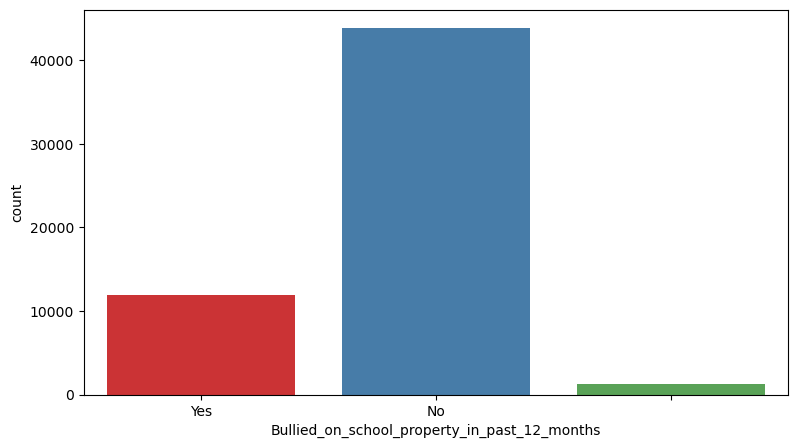

,Bullied_on_school_property_in_past_12_months,record
0,,1239
1,No,43839
2,Yes,11903


In [8]:
# Counting the number of Students Bullied on School Property in the last 12 months

plt.figure(figsize=(20,35))
plt.subplot(6,2,1)
sns.countplot(x ='Bullied_on_school_property_in_past_12_months', palette ='Set1', data =df)
plt.show()

aggregate_data = df.groupby(['Bullied_on_school_property_in_past_12_months'])['record'].count().to_frame().reset_index()
aggregate_data

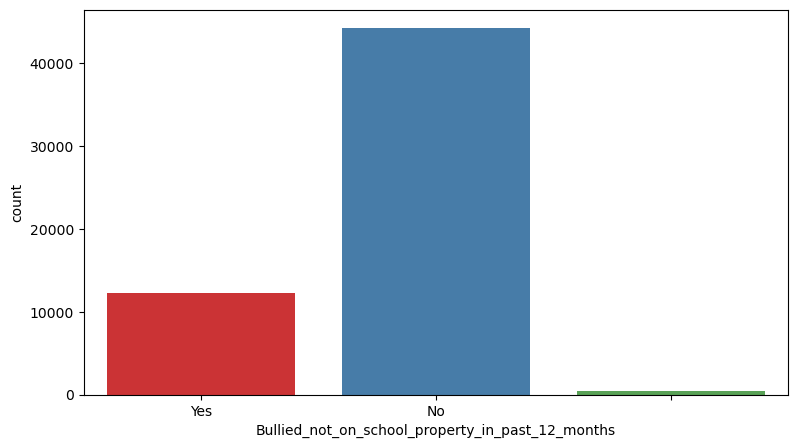

,Bullied_not_on_school_property_in_past_12_months,record
0,,489
1,No,44263
2,Yes,12229


In [9]:
# Counting the number of Students Bullied not on School Property in the last 12 months

plt.figure(figsize=(20,35))
plt.subplot(6,2,1)
sns.countplot(x ='Bullied_not_on_school_property_in_past_12_months', palette ='Set1', data =df)
plt.show()

aggregate_data = df.groupby(['Bullied_not_on_school_property_in_past_12_months'])['record'].count().to_frame().reset_index()
aggregate_data

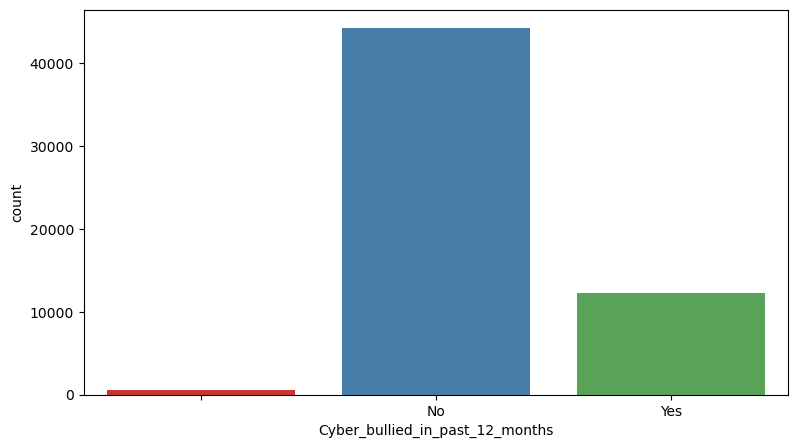

,Cyber_bullied_in_past_12_months,record
0,,571
1,No,44213
2,Yes,12197


In [10]:
# Counting the number of Students Cyber Bullied in the last 12 months

plt.figure(figsize=(20,35))
plt.subplot(6,2,1)
sns.countplot(x ='Cyber_bullied_in_past_12_months', palette ='Set1', data =df)
plt.show()

aggregate_data = df.groupby(['Cyber_bullied_in_past_12_months'])['record'].count().to_frame().reset_index()
aggregate_data

**Bullying based on Gender**

In [11]:
# Gender

cross_tab = pd.crosstab(index=df['Sex'],
                        columns=df['Bullied_on_school_property_in_past_12_months'])

cross_tab

Bullied_on_school_property_in_past_12_months,,No,Yes
Sex,,,
,56,345,135
Female,578,22023,6761
Male,605,21471,5007


In [12]:
# Gender

cross_tab = pd.crosstab(index=df['Sex'],
                        columns=df['Bullied_not_on_school_property_in_past_12_months'])

cross_tab

Bullied_not_on_school_property_in_past_12_months,,No,Yes
Sex,,,
,36,371,129
Female,222,22256,6884
Male,231,21636,5216


In [13]:
# Gender

cross_tab = pd.crosstab(index=df['Sex'],
                        columns=df['Cyber_bullied_in_past_12_months'])

cross_tab

Cyber_bullied_in_past_12_months,,No,Yes
Sex,,,
,45,371,120
Female,233,21256,7873
Male,293,22586,4204


**Bullying based on Age**

In [14]:
# Age

cross_tab = pd.crosstab(index=df['Custom_Age'],
                        columns=df['Bullied_on_school_property_in_past_12_months'])

cross_tab

Bullied_on_school_property_in_past_12_months,,No,Yes
Custom_Age,,,
,5,83,20
11 years old or younger,1,35,12
12 years old,5,106,34
13 years old,230,7850,2494
14 years old,299,9790,2857
15 years old,313,9826,2673
16 years old,209,9246,2283
17 years old,163,6593,1471
18 years old or older,14,310,59


In [15]:
# Age

cross_tab = pd.crosstab(index=df['Custom_Age'],
                        columns=df['Bullied_not_on_school_property_in_past_12_months'])

cross_tab

Bullied_not_on_school_property_in_past_12_months,,No,Yes
Custom_Age,,,
,2,80,26
11 years old or younger,1,35,12
12 years old,2,113,30
13 years old,80,8554,1940
14 years old,120,10160,2666
15 years old,126,9856,2830
16 years old,89,8913,2736
17 years old,63,6253,1911
18 years old or older,6,299,78


In [16]:
# Age

cross_tab = pd.crosstab(index=df['Custom_Age'],
                        columns=df['Cyber_bullied_in_past_12_months'])

cross_tab

Cyber_bullied_in_past_12_months,,No,Yes
Custom_Age,,,
,7,76,25
11 years old or younger,1,35,12
12 years old,4,122,19
13 years old,108,8575,1891
14 years old,145,10103,2698
15 years old,132,9743,2937
16 years old,103,8954,2681
17 years old,65,6308,1854
18 years old or older,6,297,80


**Bullying based on Loneliness**

In [17]:
# Loneliness

cross_tab = pd.crosstab(index=df['Felt_lonely'],
                        columns=df['Bullied_on_school_property_in_past_12_months'])

cross_tab

Bullied_on_school_property_in_past_12_months,,No,Yes
Felt_lonely,,,
,90,205,71
Always,86,1787,1248
Most of the time,133,4088,2201
Never,374,15225,2332
Rarely,291,11668,2468
Sometimes,265,10866,3583


In [18]:
# Loneliness

cross_tab = pd.crosstab(index=df['Felt_lonely'],
                        columns=df['Bullied_not_on_school_property_in_past_12_months'])

cross_tab

Bullied_not_on_school_property_in_past_12_months,,No,Yes
Felt_lonely,,,
,69,211,86
Always,32,1841,1248
Most of the time,45,4091,2286
Never,142,15493,2296
Rarely,109,11671,2647
Sometimes,92,10956,3666


In [19]:
# Loneliness

cross_tab = pd.crosstab(index=df['Felt_lonely'],
                        columns=df['Cyber_bullied_in_past_12_months'])

cross_tab

Cyber_bullied_in_past_12_months,,No,Yes
Felt_lonely,,,
,73,213,80
Always,32,1793,1296
Most of the time,51,4011,2360
Never,182,15731,2018
Rarely,129,11681,2617
Sometimes,104,10784,3826


**Bullying based on Parental Understanding**

In [20]:
# Parent Understanding

cross_tab = pd.crosstab(index=df['Parents_understand_problems'],
                        columns=df['Bullied_on_school_property_in_past_12_months'])

cross_tab

Bullied_on_school_property_in_past_12_months,,No,Yes
Parents_understand_problems,,,
,160,1743,470
Always,206,10670,2196
Most of the time,190,7568,1812
Never,264,8779,2922
Rarely,227,7812,2420
Sometimes,192,7267,2083


In [21]:
# Parent Understanding

cross_tab = pd.crosstab(index=df['Parents_understand_problems'],
                        columns=df['Bullied_not_on_school_property_in_past_12_months'])

cross_tab

Bullied_not_on_school_property_in_past_12_months,,No,Yes
Parents_understand_problems,,,
,95,1769,509
Always,78,10969,2025
Most of the time,60,7661,1849
Never,107,8796,3062
Rarely,76,7706,2677
Sometimes,73,7362,2107


In [22]:
# Parent Understanding

cross_tab = pd.crosstab(index=df['Parents_understand_problems'],
                        columns=df['Cyber_bullied_in_past_12_months'])

cross_tab

Cyber_bullied_in_past_12_months,,No,Yes
Parents_understand_problems,,,
,112,1784,477
Always,75,10942,2055
Most of the time,82,7666,1822
Never,114,8821,3030
Rarely,90,7752,2617
Sometimes,98,7248,2196


# Data Preprocessing

In [23]:
# Replace all whitespace and non-visible characters with NaN values
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [24]:
df.head(10)

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,Yes,Yes,NaN,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,NaN,NaN,NaN
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,NaN,NaN,NaN
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,NaN,No,No,No,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,NaN,NaN,NaN
5,6,No,No,No,13 years old,Male,0 times,1 time,Never,3 or more,0 days,Most of the time,Always,No,No,No,No,No
6,7,No,No,No,14 years old,Female,1 time,0 times,Sometimes,3 or more,0 days,Most of the time,Always,No,No,NaN,NaN,NaN
7,8,No,No,No,12 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Never,No,No,NaN,NaN,NaN
8,9,No,No,No,13 years old,Male,1 time,2 or 3 times,Never,3 or more,6 to 9 days,Most of the time,Most of the time,No,Yes,NaN,NaN,NaN
9,10,Yes,No,No,14 years old,Female,0 times,0 times,Always,0,0 days,Sometimes,Never,Yes,No,NaN,NaN,NaN


/var/folders/t2/bn7r9_q10fl9sqj6h192bfr80000gn/T/ipykernel_89041/2883410477.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(missing_perc_sorted.index, rotation=90)


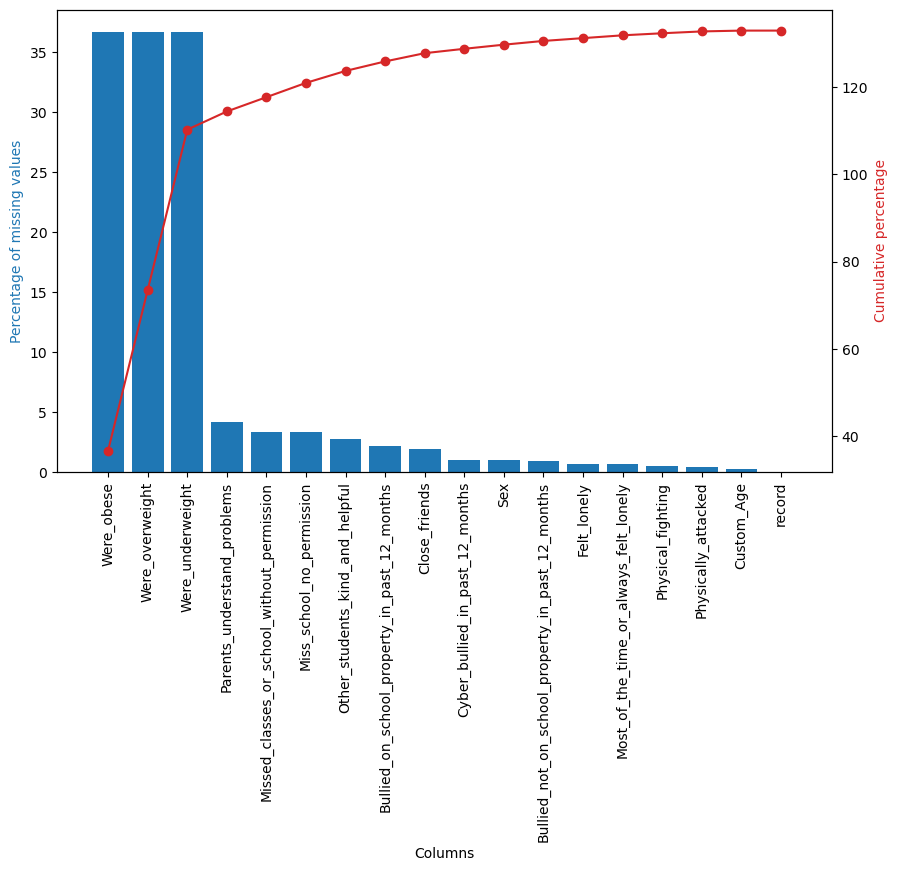

In [25]:
# Calculate the percentage of missing values in each column
missing_perc = (df.isnull().sum() / len(df)) * 100

# Sort the columns by percentage of missing values in descending order
missing_perc_sorted = missing_perc.sort_values(ascending=False)

# Calculate the cumulative percentage of missing values
cumulative_perc = missing_perc_sorted.cumsum()

# Create a Pareto chart
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(missing_perc_sorted.index, missing_perc_sorted.values, color='tab:blue')
ax1.set_xlabel('Columns')
ax1.set_ylabel('Percentage of missing values', color='tab:blue')
ax1.set_xticklabels(missing_perc_sorted.index, rotation=90)

# Add a secondary y-axis for the cumulative percentage
ax2 = ax1.twinx()
ax2.plot(missing_perc_sorted.index, cumulative_perc.values, color='tab:red', marker='o')
ax2.set_ylabel('Cumulative percentage', color='tab:red')


# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [26]:
# Drop columns with a high proportion of missing values
df.drop(['Were_underweight', 'Were_overweight', 'Were_obese'], axis=1, inplace=True)

#dropping na values
df=df.dropna()

In [27]:
df.head(10)

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No
5,6,No,No,No,13 years old,Male,0 times,1 time,Never,3 or more,0 days,Most of the time,Always,No,No
6,7,No,No,No,14 years old,Female,1 time,0 times,Sometimes,3 or more,0 days,Most of the time,Always,No,No
7,8,No,No,No,12 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Never,No,No
8,9,No,No,No,13 years old,Male,1 time,2 or 3 times,Never,3 or more,6 to 9 days,Most of the time,Most of the time,No,Yes
9,10,Yes,No,No,14 years old,Female,0 times,0 times,Always,0,0 days,Sometimes,Never,Yes,No
10,11,No,No,No,15 years old,Male,0 times,1 time,Never,3 or more,3 to 5 days,Most of the time,Always,No,Yes
11,12,Yes,Yes,Yes,13 years old,Female,12 or more times,1 time,Sometimes,3 or more,0 days,Never,Always,No,No


In [28]:
# Get the count of non-null values for each column
non_null_counts = df.count()

# Check if all columns have the same count of non-null values
if non_null_counts.nunique() == 1:
    print("Total null values:", df.isnull().sum().sum())
else:
    print("Columns have different counts of non-null values.")

Total null values: 0


In [29]:
df.shape

(50754, 15)

In [30]:
# Feature Addition: Code to Increase Feature Size

# def one_hot_encoder(df, nan_as_category = False):
#     original_columns = list(df.columns)
#     categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
#     df = pd.get_dummies(df, columns = categorical_columns, dummy_na = nan_as_category)
#     new_columns = [c for c in df.columns if c not in original_columns]
#     return df

In [31]:
# df_dummy = one_hot_encoder(df)
# # df_credit_T = one_hot_encoder(df_copy.drop('Risk',axis=1))
# print(df_dummy.info())

In [32]:
# df = pd.concat([df_dummy, df], axis=1)

# Feature Engineering

In [33]:
df.head()

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No
5,6,No,No,No,13 years old,Male,0 times,1 time,Never,3 or more,0 days,Most of the time,Always,No,No
6,7,No,No,No,14 years old,Female,1 time,0 times,Sometimes,3 or more,0 days,Most of the time,Always,No,No


In [34]:
df.shape

(50754, 15)

In [35]:
# df.head(20)
# df['Bullied or Not'].nunique()

In [36]:
# encode categorical variables
le = LabelEncoder()
df['Bullied_on_school_property_in_past_12_months'] = le.fit_transform(df['Bullied_on_school_property_in_past_12_months'])
df['Bullied_not_on_school_property_in_past_12_months'] = le.fit_transform(df['Bullied_not_on_school_property_in_past_12_months'])
df['Cyber_bullied_in_past_12_months'] = le.fit_transform(df['Cyber_bullied_in_past_12_months'])
df['Sex'] = le.fit_transform(df['Sex'])
df['Felt_lonely'] = le.fit_transform(df['Felt_lonely'])
df['Miss_school_no_permission'] = le.fit_transform(df['Miss_school_no_permission'])
df['Other_students_kind_and_helpful'] = le.fit_transform(df['Other_students_kind_and_helpful'])
df['Parents_understand_problems'] = le.fit_transform(df['Parents_understand_problems'])
df['Most_of_the_time_or_always_felt_lonely'] = le.fit_transform(df['Most_of_the_time_or_always_felt_lonely'])
df['Missed_classes_or_school_without_permission'] = le.fit_transform(df['Missed_classes_or_school_without_permission'])
df['Custom_Age'] = le.fit_transform(df['Custom_Age'])
df['Physically_attacked'] = le.fit_transform(df['Physically_attacked'])
df['Physical_fighting'] = le.fit_transform(df['Physical_fighting'])
df['Close_friends'] = le.fit_transform(df['Close_friends'])

In [37]:
# Create Target Variable
df['Bullied or Not'] = 0
df['Bullied or Not'] = np.where(((df['Bullied_on_school_property_in_past_12_months'] == 1) |  (df['Bullied_not_on_school_property_in_past_12_months'] == 1) | (df['Cyber_bullied_in_past_12_months'] == 1)) , 1, 0)

In [38]:
df.head(10)

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Bullied or Not
1,2,0,0,0,2,0,0,0,2,3,0,4,0,0,0,0
2,3,0,0,0,3,1,0,0,2,3,0,4,0,0,0,0
4,5,0,0,0,2,0,0,0,3,3,0,1,1,0,0,0
5,6,0,0,0,2,1,0,1,2,3,0,1,0,0,0,0
6,7,0,0,0,3,0,1,0,4,3,0,1,0,0,0,0
7,8,0,0,0,1,0,0,0,3,3,0,1,2,0,0,0
8,9,0,0,0,2,1,1,4,2,3,4,1,1,0,1,0
9,10,1,0,0,3,0,0,0,0,0,0,4,2,1,0,1
10,11,0,0,0,4,1,0,1,2,3,3,1,0,0,1,0
11,12,1,1,1,2,0,3,1,4,3,0,2,0,0,0,1


In [39]:
#Drop Features after creating Target Varibale
df.drop(['Bullied_on_school_property_in_past_12_months' , 'Bullied_not_on_school_property_in_past_12_months' , 'Cyber_bullied_in_past_12_months'], axis=1, inplace=True)

<AxesSubplot:>

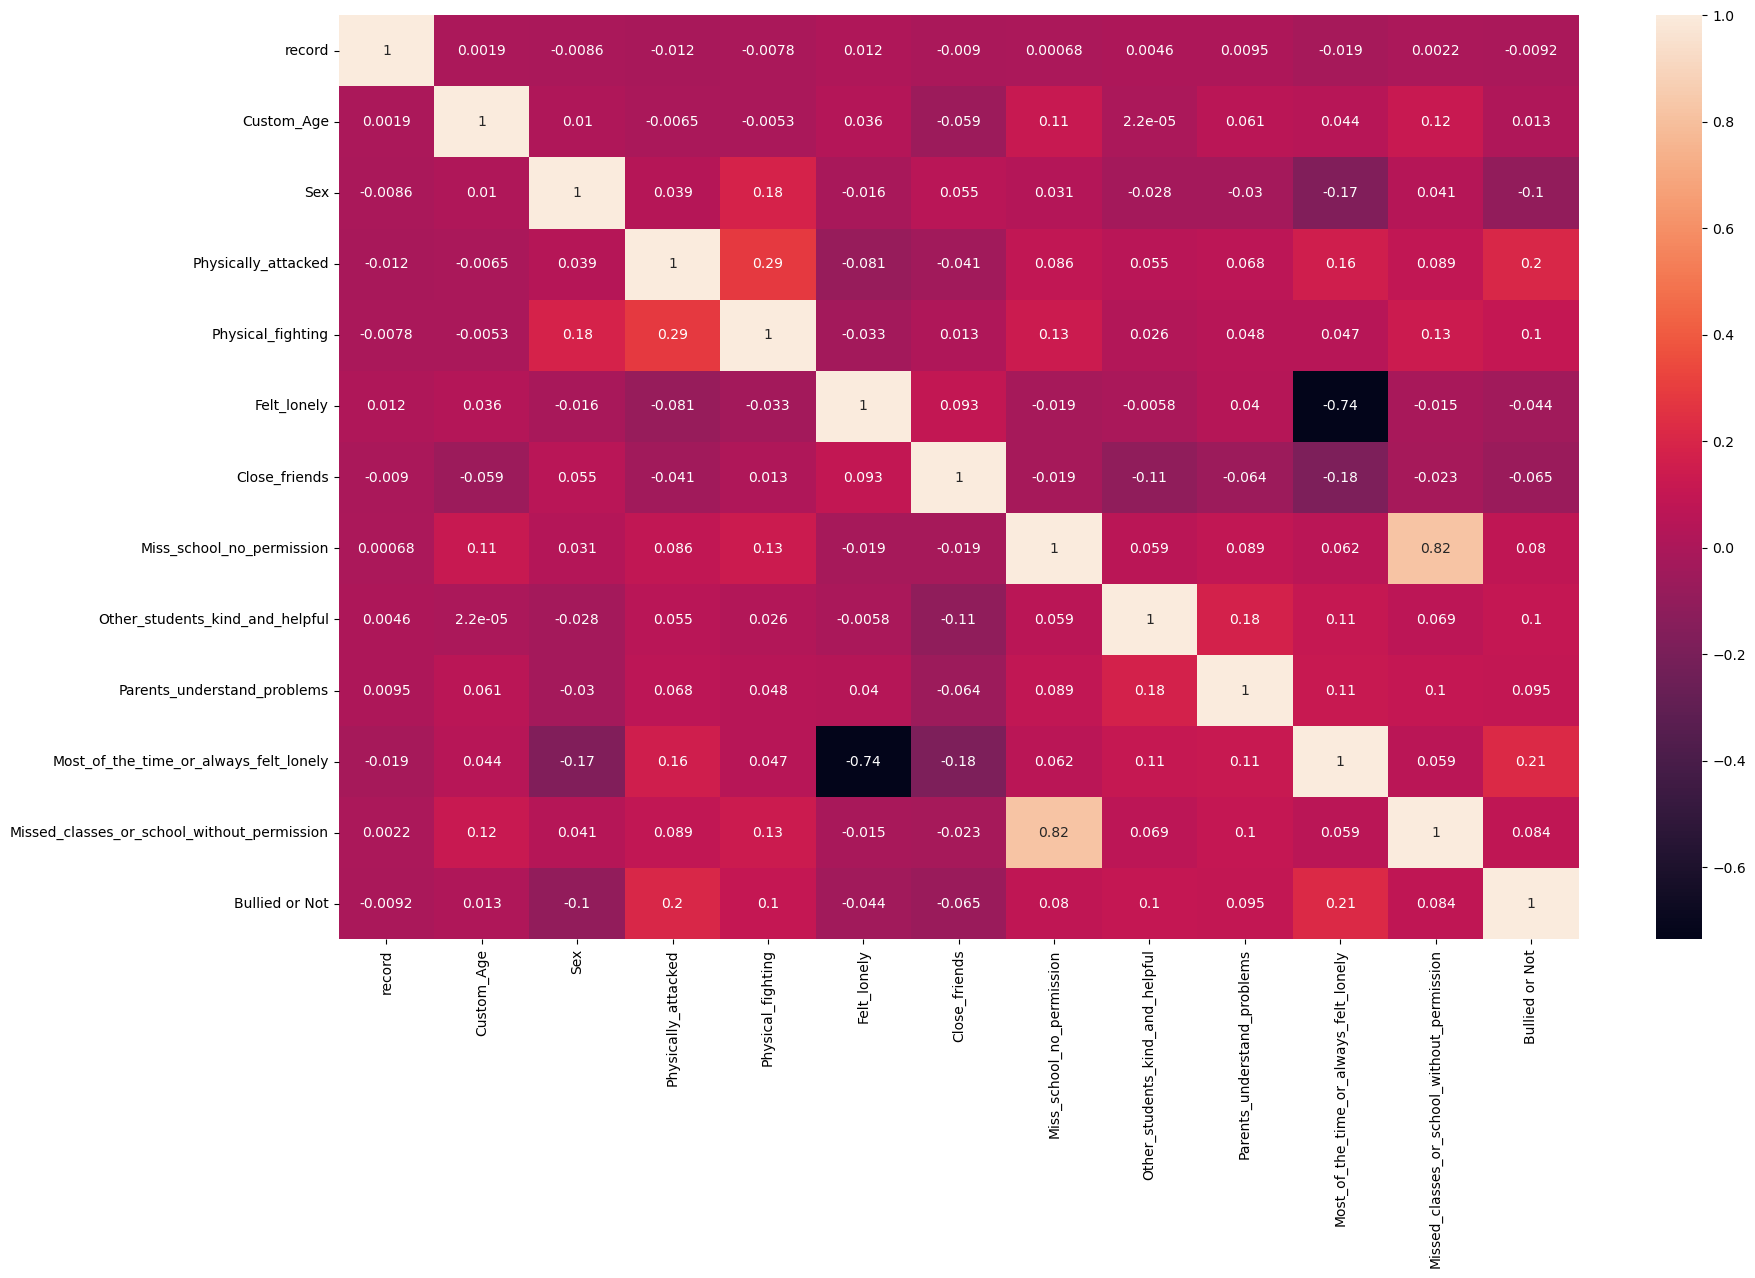

In [40]:
# Heat Map

plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True)

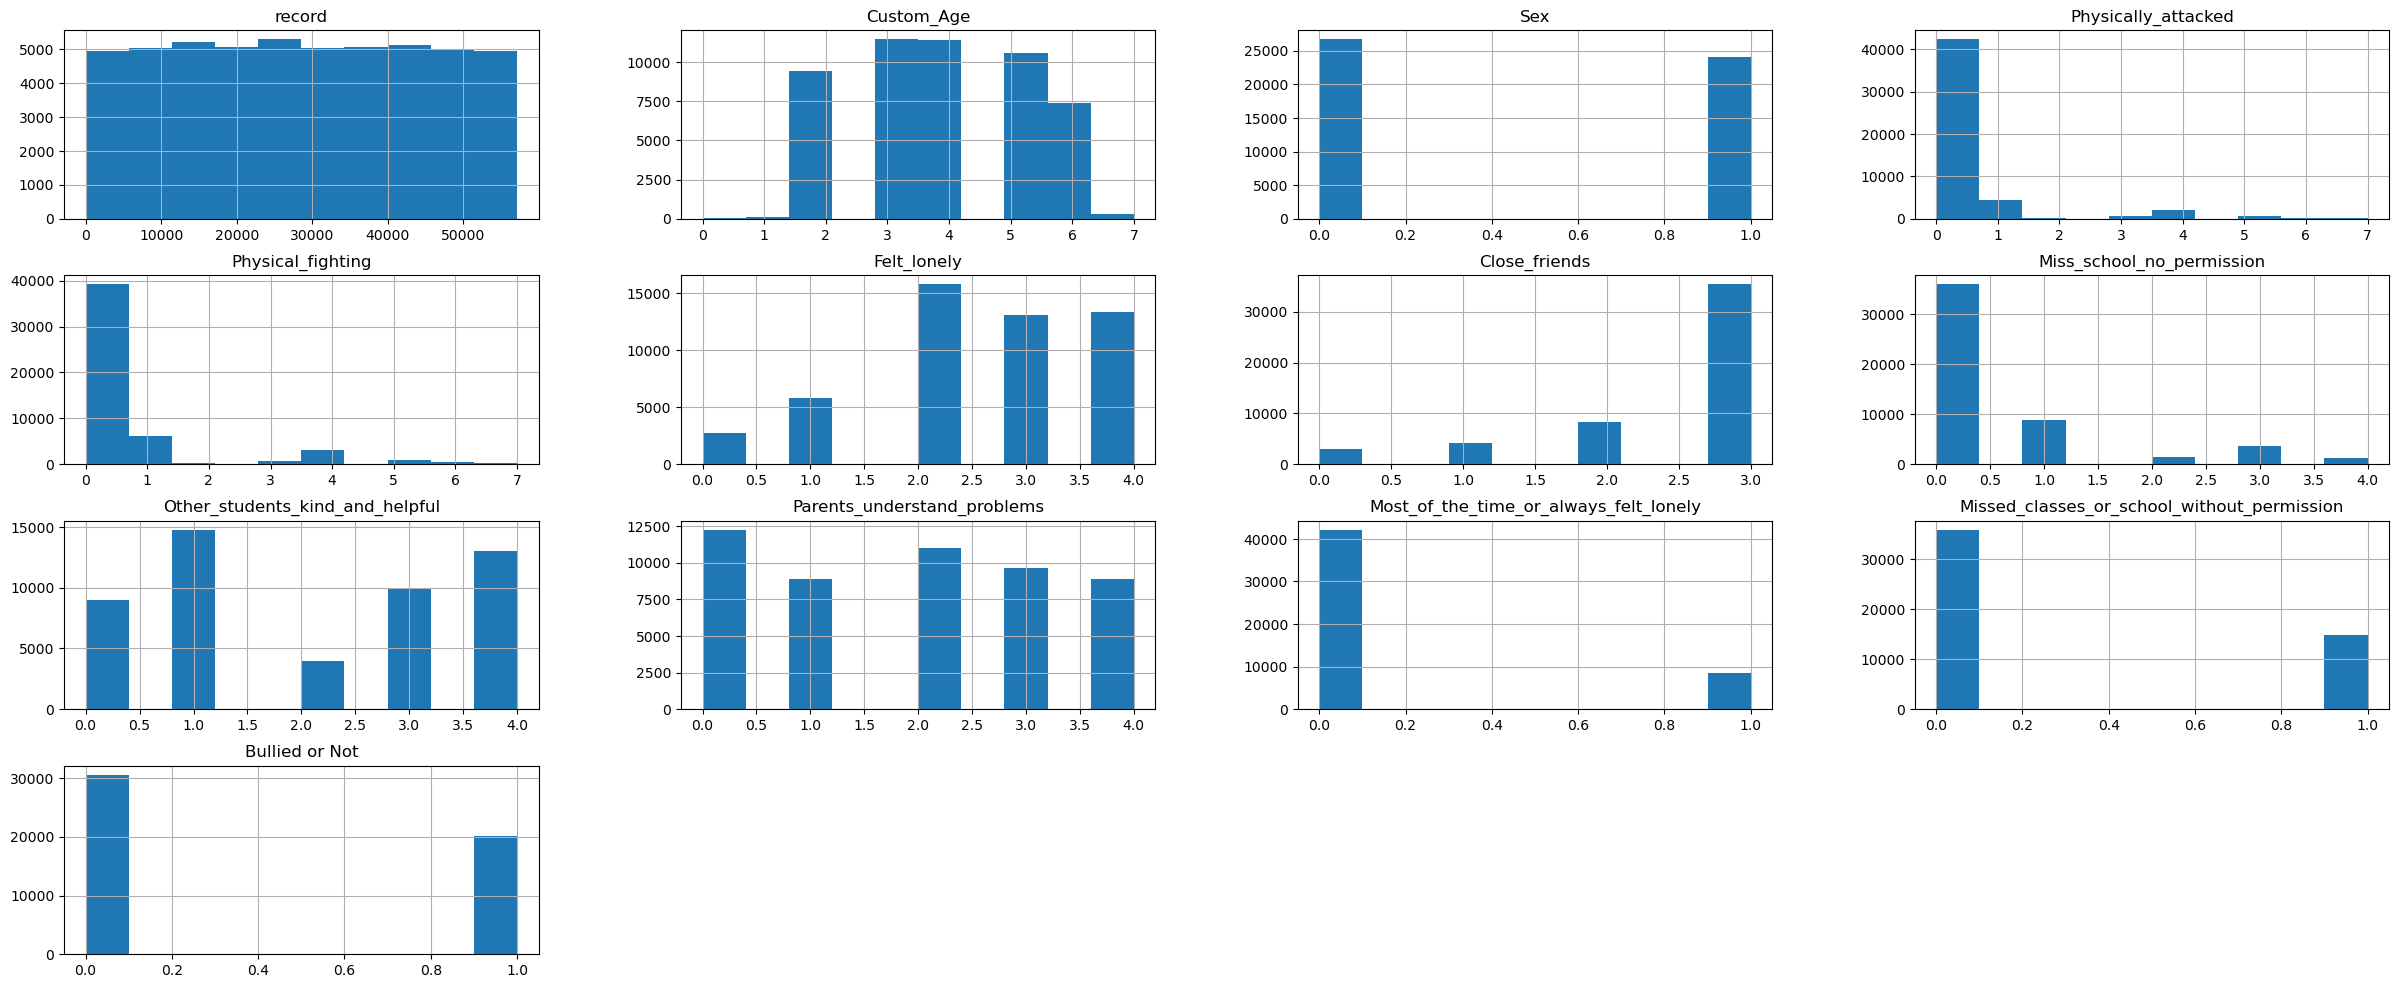

In [41]:
# Data Visualization
plt.rcParams['figure.figsize']=30,12               #Selecting size and width of the plot
df.hist()                                 #Choosing bar/histogram for visualization
plt.show()                                         #Display the visualization

In [42]:
# split data into training and testing sets
X = df.drop(['record', 'Bullied or Not'], axis=1)
y = df['Bullied or Not']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# let's call the k-best method with Chi-squared score and pass X and y as inputs

chi2 = SelectKBest(score_func = chi2, k = 'all').fit(X,y)

# create Series with variable name as index, and scores as values, and sort lowest to highest ready for plotting

chi2_sorted = pd.Series(data=chi2.scores_, index=X.columns).sort_values()

#Repeat but with other scoring functions

ftest = SelectKBest(score_func = f_classif, k = 'all').fit(X,y)
ftest_sorted = pd.Series(data=ftest.scores_, index=X.columns).sort_values()

mitest = SelectKBest(score_func = mutual_info_classif, k = 'all').fit(X,y)
mitest_sorted = pd.Series(data=mitest.scores_, index=X.columns).sort_values()

In [44]:
xtrees = ExtraTreesClassifier().fit(X, y)
xtrees_sorted = pd.Series(data=xtrees.feature_importances_, index=X.columns).sort_values()
from sklearn.feature_selection import mutual_info_classif

muinfo = mutual_info_classif(X,y)
muinfo_sorted = pd.Series(data=muinfo, index=X.columns).sort_values()

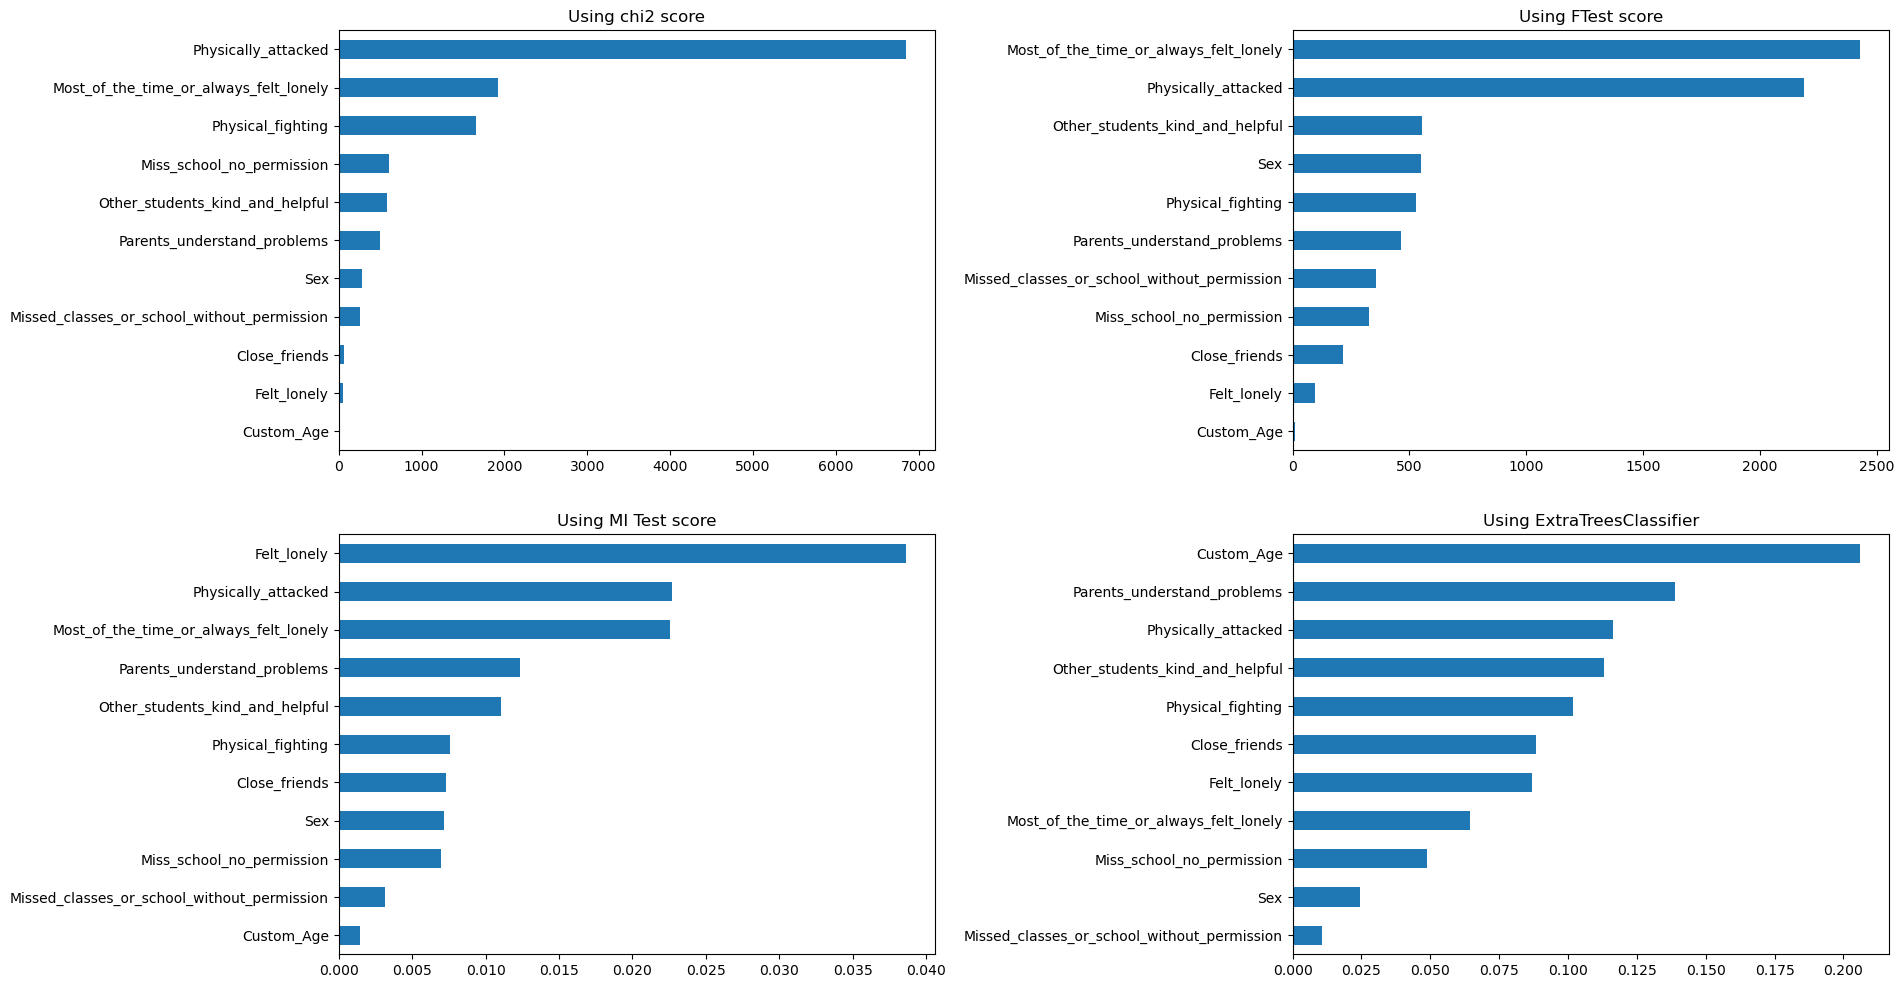

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
plt.subplots_adjust(wspace=0.6)
chi2_sorted.plot(kind='barh', ax=axes[0, 0], title='Using chi2 score')
ftest_sorted.plot(kind='barh', ax=axes[0, 1], title='Using FTest score')
xtrees_sorted.plot(kind='barh', ax=axes[1, 1], title='Using ExtraTreesClassifier')
mitest_sorted.plot(kind='barh', ax=axes[1, 0], title='Using MI Test score')
plt.show()

In [46]:
#Drop Features after Validation Correlation from HeatMap & Correlation Tests
df.drop(['Most_of_the_time_or_always_felt_lonely' , 'Miss_school_no_permission'], axis=1, inplace=True)

# Starting with ML Models

In [47]:
# Creating Method to Print Accuracy, F1 Score, Recall and other metric after an ML Model is run
Final_Result = {}

In [48]:
def train_and_evaluate(model, X, y, name=""):
    """
        Train and evaluate a classification model on training data
        and produce accuracy metrics for a separate test set.
    """

    print('\nResults from algorithm {}:'.format(model))

    # Split data into train and test - we will use test for the final accuracy metrics
    # and not use it to train the model. This is good practice, particularly when you are
    # using cross-validation to select model parameters ... that way, the characteristics
    # of the test data don't leak into the model training
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Cross-validation accuracy gives an indication of variation in accuracy and a better
    # estimate for overall accuracy than just a single estimate. The mean cross-validation
    # accuracy is therefore a better guide when selecting model parameters or comparing models
    
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print('Mean cross-validation accuracy is {:.3f} with SD {:.3f}'
          .format(np.mean(scores), np.std(scores)))

    # Fit model using all of the reserved training data ... look at training accuracy 
    # which we generally expect to be better than test accuracy

    learnt_model = model.fit(X_train, y_train)
    print('\nAccuracy on training data is {:.3f}\n'.format(model.score(X_train, y_train)))
    
    # User predict() to predict target values from test feature variables, and then
    # use functions to compute evaluation metrics relevant to binary outcome variable

    y_pred = model.predict(X_test)
    print('Test data metrics: accuracy={:.3f}, f1={:.3f}, precision={:.3f}, recall={:.3f}'
          .format(accuracy_score(y_true=y_test, y_pred=y_pred),
                  f1_score(y_true=y_test, y_pred=y_pred),
                  precision_score(y_true=y_test, y_pred=y_pred),
                  recall_score(y_true=y_test, y_pred=y_pred)))
    
    # Draw out a confusion matrix
    
    cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
    plt.figure(figsize=(2, 2))
    ax = sns.heatmap(cm,annot=True, xticklabels=['No', 'Yes'], cbar=False,
                     yticklabels=['No', 'Yes'], square=True,
                     linewidths=8.0) # plots the confusion matrix
    ax.set_xlabel('Bullying Prediction')
    ax.set_ylabel('Actually Being Bullied')
    plt.show()
    
    Final_Result[name] = {"Train" : model.score(X_train, y_train) ,"Test" : accuracy_score(y_true=y_test, y_pred=y_pred)}

    return learnt_model

# Decision Tree Classifier


Results from algorithm DecisionTreeClassifier(random_state=42):
Mean cross-validation accuracy is 0.626 with SD 0.006

Accuracy on training data is 0.822

Test data metrics: accuracy=0.634, f1=0.459, precision=0.559, recall=0.390


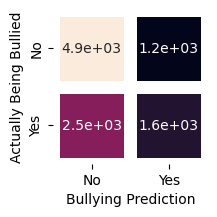

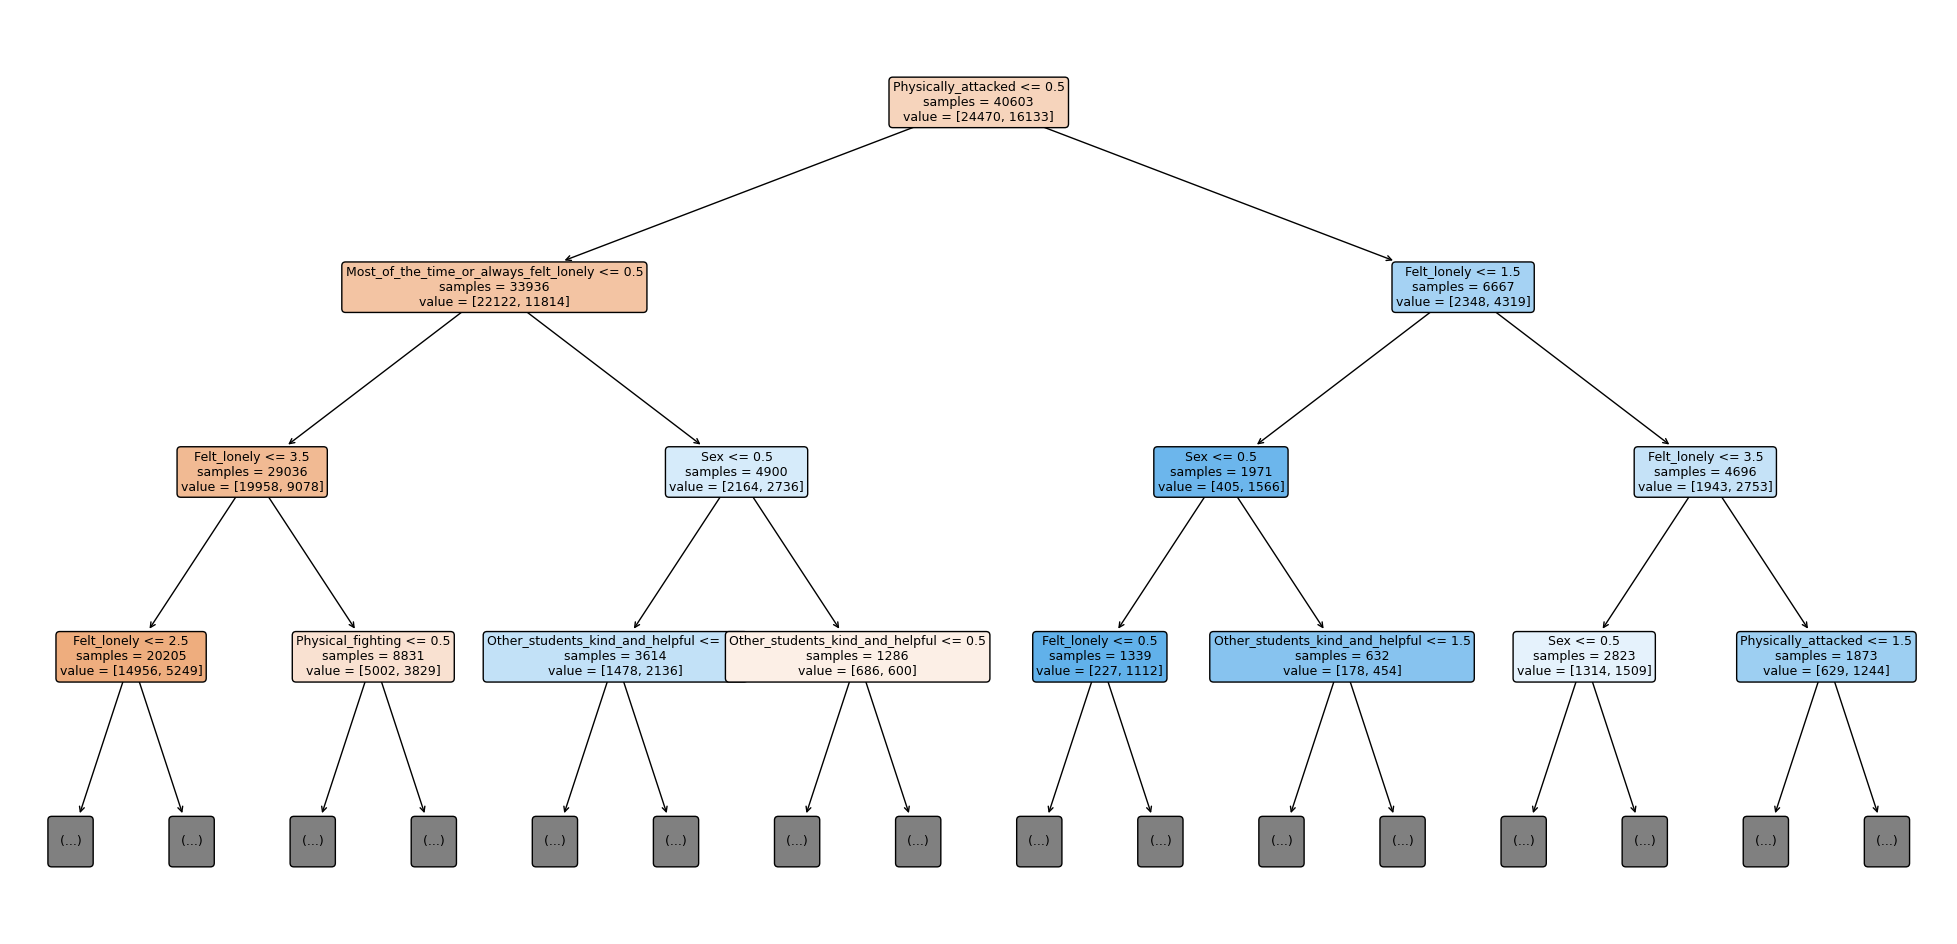

In [49]:
# train Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
learnt_model = train_and_evaluate(dt_clf, X, y, "Decision Tree Classifier")
plt.figure(figsize=(25, 12))
plot_tree(learnt_model, max_depth=3, feature_names=X.columns,
          fontsize=9, filled=True, impurity=False, rounded=True)
plt.show()

# Logistic Regression


Results from algorithm LogisticRegression():
Mean cross-validation accuracy is 0.664 with SD 0.005

Accuracy on training data is 0.664

Test data metrics: accuracy=0.670, f1=0.477, precision=0.648, recall=0.377


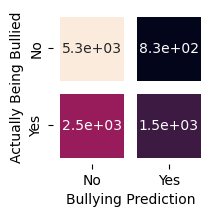

In [50]:
# train Logistic Regression Model
lr_clf = LogisticRegression()
_ = train_and_evaluate(lr_clf, X, y, "Logistic Regression")

# KNN


Results from algorithm KNeighborsClassifier():
Mean cross-validation accuracy is 0.629 with SD 0.004

Accuracy on training data is 0.724

Test data metrics: accuracy=0.631, f1=0.487, precision=0.546, recall=0.439


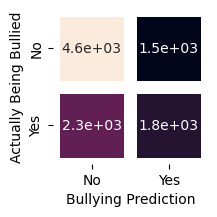

In [51]:
# train K Nearest Neighbors Model
knn_clf = KNeighborsClassifier(n_neighbors=5)
_ = train_and_evaluate(knn_clf, X, y, "K Neighbors Classifier")

# Random Forest


Results from algorithm RandomForestClassifier():
Mean cross-validation accuracy is 0.640 with SD 0.006

Accuracy on training data is 0.822

Test data metrics: accuracy=0.641, f1=0.502, precision=0.561, recall=0.455


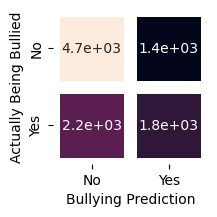

In [52]:
# train Random Forest Classifier
rm_clf = RandomForestClassifier()
_ = train_and_evaluate(rm_clf, X, y, "Random Forest Classifier")

# Support Vector Classifier


Results from algorithm SVC():
Mean cross-validation accuracy is 0.668 with SD 0.004

Accuracy on training data is 0.670

Test data metrics: accuracy=0.675, f1=0.512, precision=0.638, recall=0.427


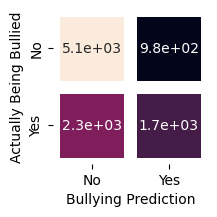

In [52]:
# train Support Vector Classifier
sv_clf = SVC()
_ = train_and_evaluate(sv_clf, X, y, "SVC")

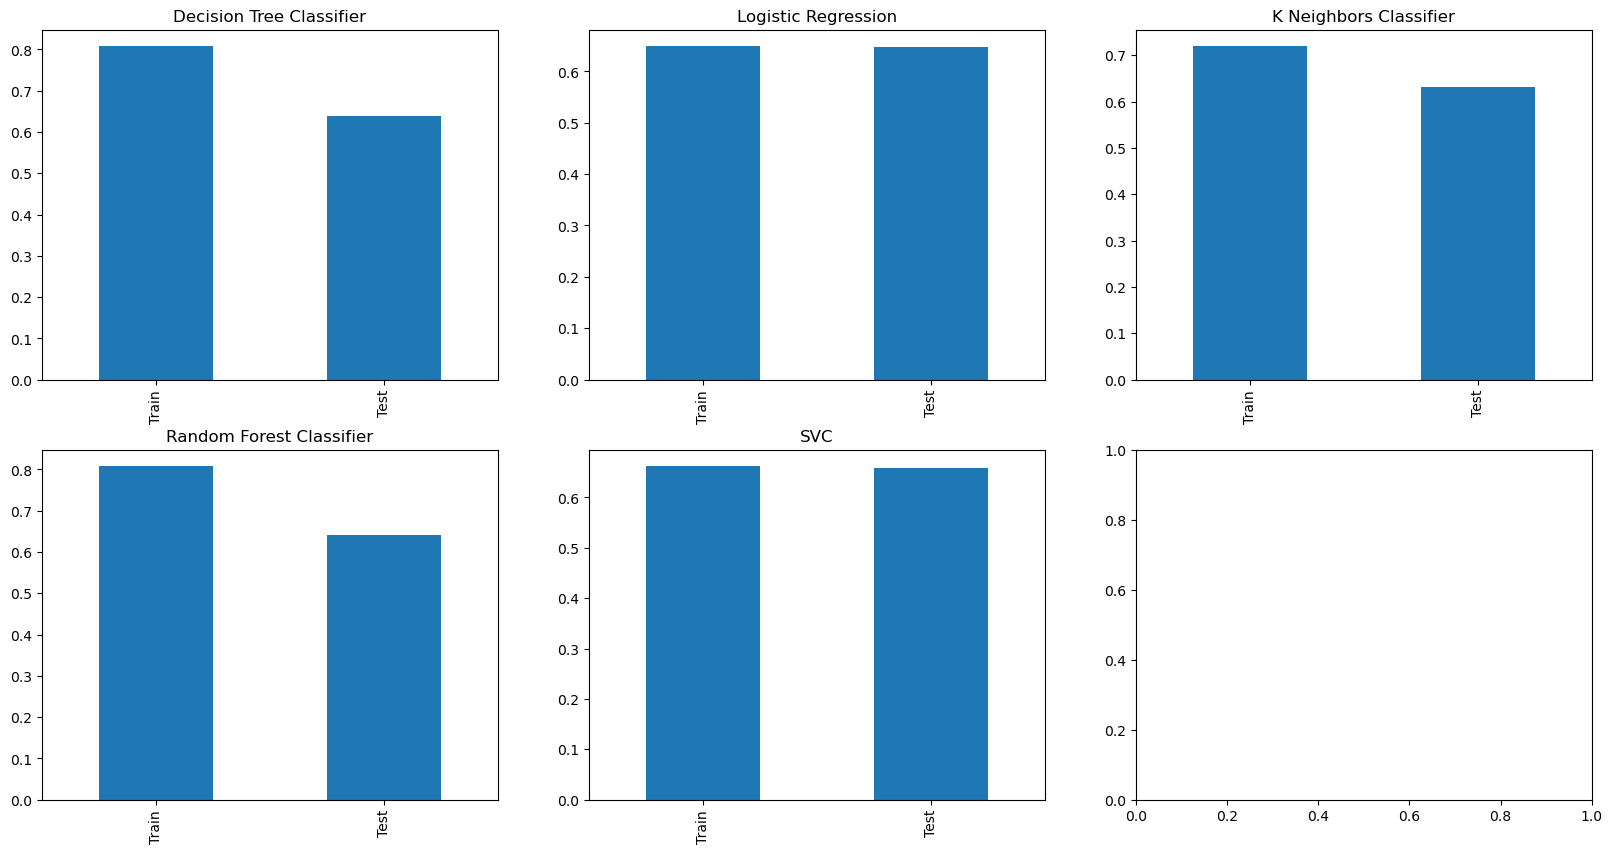

In [ ]:
# Final Visualization Plot of all ML Models
result_plot = pd.DataFrame(Final_Result)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
result_plot['Decision Tree Classifier'].plot(kind='bar',ax=axes[0,0],title="Decision Tree Classifier")
result_plot['Logistic Regression'].plot(kind='bar',ax=axes[0,1],title="Logistic Regression")
result_plot['K Neighbors Classifier'].plot(kind='bar',ax=axes[0,2],title="K Neighbors Classifier")
result_plot['Random Forest Classifier'].plot(kind='bar',ax=axes[1,0],title="Random Forest Classifier")
result_plot['SVC'].plot(kind='bar',ax=axes[1,1],title="SVC")
plt.show()